In [17]:
# 라이브러리 임포트

import tensorflow as tf
import warnings
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
# 데이터셋 다운로드

imdb = keras.datasets.imdb

In [3]:
# 데이터 분리

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = 10000)
print('훈련 샘플 개수 : {}, 테스트 개수 :{}'.format(len(x_train), len(x_test)))

훈련 샘플 개수 : 25000, 테스트 개수 :25000


In [4]:
# 데이터 확인 (encode 된 데이터를 다운 받음을 알 수 있다.)

print(x_train[0])
print('라벨 : ', y_train[0])
print('1번째 리뷰 문장 길이 : ', len(x_train[0]))
print('2번째 리뷰 문장 길이 : ', len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨 :  1
1번째 리뷰 문장 길이 :  218
2번째 리뷰 문장 길이 :  189


In [5]:
# IMDb 데이터셋은 encode 에 사용한 딕셔너리도 제공한다.

word_to_index = imdb.get_word_index()
index_to_word = {index : word for word, index in word_to_index.items()}

print(index_to_word[1])
print(word_to_index['the'])

the
1


In [6]:
# 텍스트 인코딩을 위한 word_to_index, index_to_word 보정

# 실제 인코딩 인덱스는 제공된 word_to_index 기준 3씩 밀려있다.
word_to_index = {k :(v + 3) for k, v in word_to_index.items()}

word_to_index['<PAD>'] = 0
word_to_index['<BOS>'] = 1
word_to_index['<UNK>'] = 2
word_to_index['<UNUSED>'] = 3

index_to_word[0] = '<PAD>'
index_to_word[1] = '<BOS>'
index_to_word[2] = '<UNK>'
index_to_word[3] = '<UNUSED>'

index_to_word = {index : word for word, index in word_to_index.items()}

print(index_to_word[1])
print(word_to_index['the'])
print(index_to_word[4])

<BOS>
4
the


In [7]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수
# 단, 모든 문장은 <BOS>로 시작 
def get_encoded_sentence(sentence, word_to_index) : 
    return [word_to_index['<BOS>']] + [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]
print(get_encoded_sentence('i eat lunch', word_to_index))

# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode 해주는 함수
def get_encoded_sentences(sentences, word_to_index) : 
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode 된 문장을 원래대로 decode 하는 함수
# [1 : ] 를 통해 <BOS> 를 제외
def get_decoded_sentence(encoded_sentence, index_to_word) :
    return ''.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1 : ])

# 여러개의 숫자 벡터로 encode 된 문장을 한꺼번에 원래대로 decoded 하는 함수
def get_decoded_sentences(encoded_sentences, index_to_word) :
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

[1, 13, 1900, 6803]


In [8]:
# encode 된 텍스트가 정상적으로 decode 되는지 확인

# 숫자 벡터로 encode 된 문장을 원래대로 decode 하는 함수
# [1 : ] 를 통해 <BOS> 를 제외
def get_decoded_sentence(encoded_sentence, index_to_word) :
    return ''.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1 : ])

print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨 : ', y_train[0])

thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<UNK>isanamazingactorandnowthesamebeingdirector<UNK>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<UNK>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<UNK>tothetwolittleboy'sthatplayedthe<UNK>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<UNK>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall
라벨 :  1


In [9]:
# 문장의 최대 길이인 maxlen 값은 모델 성능에 영향을 미치기에 
# 적절한 값을 찾기 위해 데이터셋의 분포를 확인해야 한다.

total_data_text = list(x_train) + list(x_test)

# 텍스트 데이터 문장길이의 리스트 생성
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장길이의 평균값 최대값, 표준편차를 계산
print("문장길이 평균 : ", np.mean(num_tokens))
print("문장길이 최대값 : ", np.mean(num_tokens))
print("문장길이 표준편차 : ", np.mean(num_tokens))

# 최대 길이를 평균 + 2 * 표준편차로 수정
max_tokens = np.mean(num_tokens) + (2 * np.std(num_tokens))
maxlen = int(max_tokens)

print('pad sequences maxlen : ', maxlen)
print('전체 문장의 {}% 가 maxlen 설정값 이내에 포함됩니다.'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  234.75892
문장길이 최대값 :  234.75892
문장길이 표준편차 :  234.75892
pad sequences maxlen :  580
전체 문장의 0.94536% 가 maxlen 설정값 이내에 포함됩니다.


In [10]:
# padding 을 post 에 하는 것과 pre 에 함에 따라 성능 차이가 발생
# 따라서 각각 학습시켜보며 결과를 비교하여 선택
# 일반적으로 마지막 입력이 최종 state 값에 영향을 미치므로,
# 마지막 입력이 무의미한 padding 으로 채워지는 것은 비효율 적이다.

x_train = keras.preprocessing.sequence.pad_sequences(x_train, value = word_to_index['<PAD>'], padding = 'pre', maxlen = maxlen)

x_test = keras.preprocessing.sequence.pad_sequences(x_test, value = word_to_index['<PAD>'], padding = 'pre', maxlen = maxlen)

print(x_train.shape)

(25000, 580)


In [41]:
# RNN 모델 설계

vocab_size = 10000    # 어휘사전의 크기
word_vector_dim = 64    # 워드 벡터의 차원수 (변경 가능한 파라미터)

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape = (None, )))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 2336      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 642,417
Trainable params: 642,417
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 훈련용 데이터에서 10,000 건을 분리하여 validation 셋으로 사용

x_val = x_train[ : 10000]
y_val = y_train[ : 10000]

partial_x_train = x_train[10000 : ]
partial_y_train = y_train[10000 : ]

print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 580)
(15000,)


In [43]:
# 모델 학습

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

epochs = 10

history = model.fit(partial_x_train, partial_y_train, epochs = epochs, batch_size = 512, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/10
30/30 [==============================] - 3s 101ms/step - loss: 0.6868 - accuracy: 0.6137 - val_loss: 0.6716 - val_accuracy: 0.6733
Epoch 2/10
30/30 [==============================] - 3s 94ms/step - loss: 0.6176 - accuracy: 0.7494 - val_loss: 0.5164 - val_accuracy: 0.7905
Epoch 3/10
30/30 [==============================] - 3s 94ms/step - loss: 0.4518 - accuracy: 0.8240 - val_loss: 0.4461 - val_accuracy: 0.8119
Epoch 4/10
30/30 [==============================] - 3s 95ms/step - loss: 0.3446 - accuracy: 0.8791 - val_loss: 0.3747 - val_accuracy: 0.8472
Epoch 5/10
30/30 [==============================] - 3s 93ms/step - loss: 0.2665 - accuracy: 0.9095 - val_loss: 0.3619 - val_accuracy: 0.8497
Epoch 6/10
30/30 [==============================] - 3s 95ms/step - loss: 0.2154 - accuracy: 0.9308 - val_loss: 0.3734 - val_accuracy: 0.8499
Epoch 7/10
30/30 [==============================] - 3s 95ms/step - loss: 0.1784 - accuracy: 0.9468 - val_loss: 0.3810 - val_accuracy: 0.8519
Epoch 8/10
3

In [44]:
# 테스트 셋으로 모델 평가

results = model.evaluate(x_test, y_test, verbose = 2)

print(results)

782/782 - 8s - loss: 0.4506 - accuracy: 0.8406
[0.45055150985717773, 0.8406400084495544]


In [45]:
# 학습 과정을 시각화

history_dict = history.history
print(history_dict.keys())    # epoch 에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


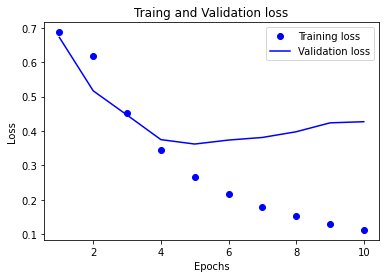

In [46]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')    # bo : 파란색 점
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')    # b : 파란색 실선
plt.title('Traing and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

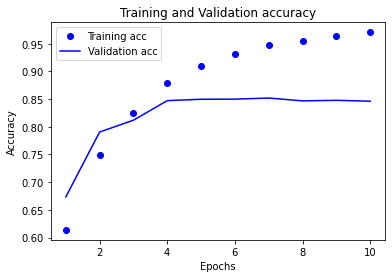

In [47]:
plt.clf()    # 시각화 초기화

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()